# Install Dependencies and Setup

In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Exploring the Data

In [276]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [277]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [278]:
df.shape

(7043, 21)

In [279]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [281]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Customizing the Data

In [282]:
df["Partner"] = df["Partner"].astype(bool)
df["Dependents"] = df["Dependents"].astype(bool)
df["PhoneService"] = df["PhoneService"].astype(bool)
df["PaperlessBilling"] = df["PaperlessBilling"].astype(bool)
df["Churn"] = df["Churn"].astype(bool)

In [283]:
bool_columns = ["Partner", "Dependents", "PaperlessBilling", "Churn","PhoneService"]
df[bool_columns] = df[bool_columns].astype(int)

In [284]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,1,1,1,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,1
1,5575-GNVDE,Male,0,1,1,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,1,Mailed check,56.95,1889.5,1
2,3668-QPYBK,Male,0,1,1,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,1,1,45,1,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,1,Bank transfer (automatic),42.30,1840.75,1
4,9237-HQITU,Female,0,1,1,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,1,1,8,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.5,1
6,1452-KIOVK,Male,0,1,1,22,1,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.4,1
7,6713-OKOMC,Female,0,1,1,10,1,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,29.75,301.9,1
8,7892-POOKP,Female,0,1,1,28,1,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,1,1,62,1,No,DSL,Yes,...,No,No,No,No,One year,1,Bank transfer (automatic),56.15,3487.95,1


In [285]:
df = df.drop(columns=["customerID"])

In [286]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,1,1,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,1
1,Male,0,1,1,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,1,Mailed check,56.95,1889.5,1
2,Male,0,1,1,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,1,1,45,1,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,1,Bank transfer (automatic),42.30,1840.75,1
4,Female,0,1,1,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


# Cleaning the Data

In [287]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Analysis 

### 1. Gender Distribution

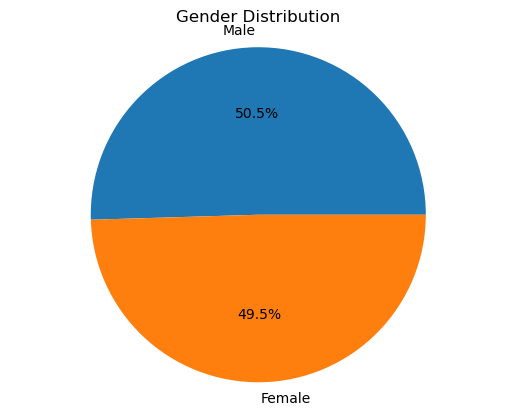

In [288]:
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

### 2. Senior Citizen Distribution

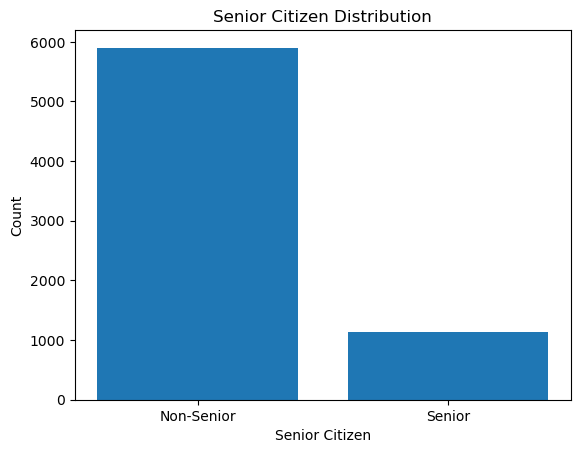

In [289]:
senior_counts = df['SeniorCitizen'].value_counts()
plt.bar(['Non-Senior', 'Senior'], senior_counts.values)
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.title('Senior Citizen Distribution')
plt.show()

### 3. Distribution of Monthly Charges for Churned Customers

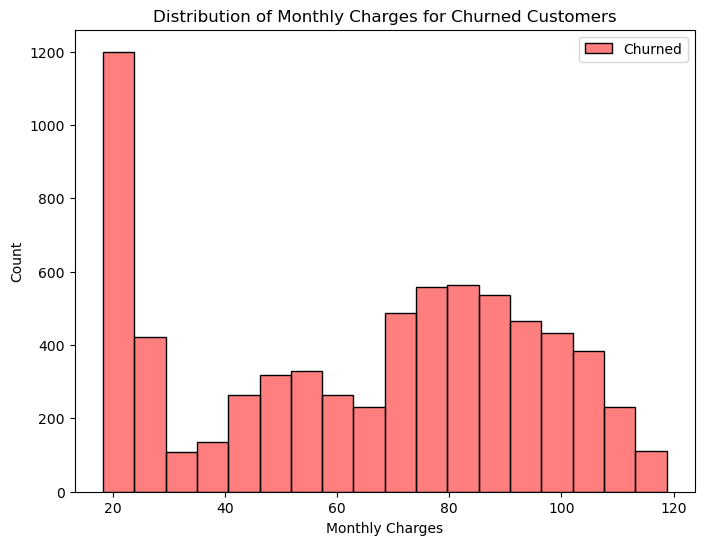

In [290]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df[df['Churn'] == True], x='MonthlyCharges', color='red', alpha=0.5, label='Churned')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.title('Distribution of Monthly Charges for Churned Customers')
plt.legend()

### 4. Correlation Heatmap

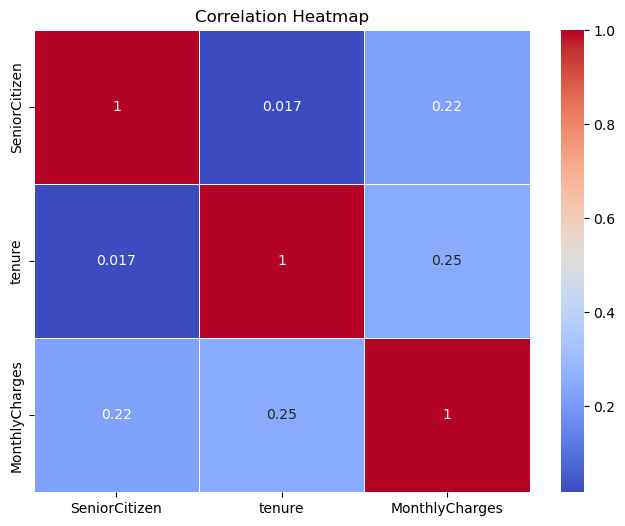

In [291]:
numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

###  5. Payment Method Analysis

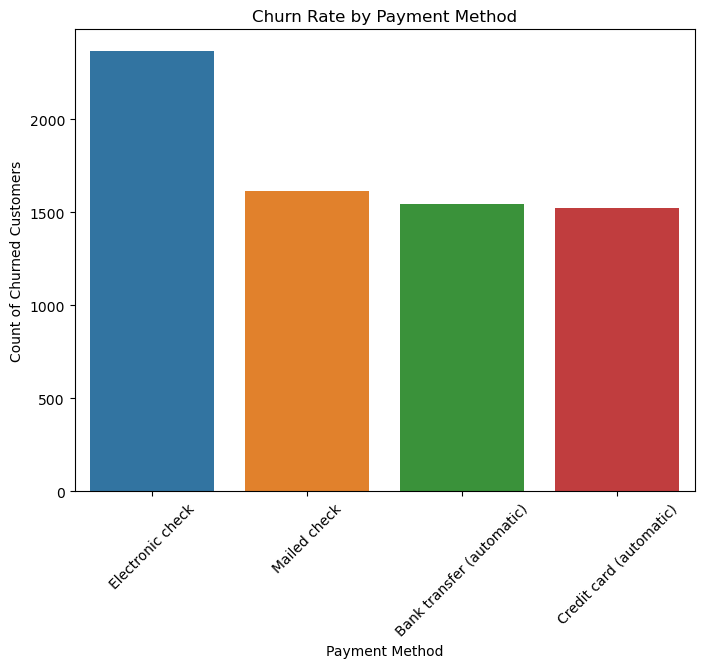

In [292]:
churned_customers = df[df['Churn'] == True]
churn_by_payment_method = churned_customers['PaymentMethod'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_by_payment_method.index, y=churn_by_payment_method.values)
plt.xlabel('Payment Method')
plt.ylabel('Count of Churned Customers')
plt.title('Churn Rate by Payment Method')
plt.xticks(rotation=45)
plt.show()

### 6. Tenure Analysis

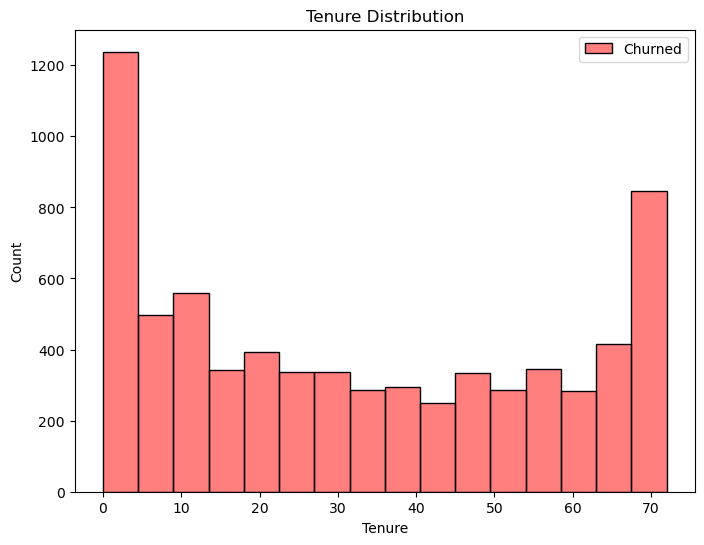

In [293]:
churned_tenure = df[df['Churn'] == True]['tenure']
non_churned_tenure = df[df['Churn'] == False]['tenure']
plt.figure(figsize=(8, 6))
sns.histplot(data=churned_tenure, color='red', alpha=0.5, label='Churned')
sns.histplot(data=non_churned_tenure, color='blue', alpha=0.5, label='Non-Churned')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Tenure Distribution')
plt.legend()
plt.show()

# Building the Machine Learning Model

In [294]:
df = df.drop(columns=["gender","MultipleLines"])

In [295]:
df = df.drop(columns=["TotalCharges"])

In [296]:
# Encode categorical columns
cat_columns = ["InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]
le = LabelEncoder()
df[cat_columns] = df[cat_columns].apply(le.fit_transform)

In [297]:
# Split the dataset into features (X) and target (y)
X = df.drop("Churn", axis=1)
Y = df["Churn"]

In [298]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [299]:
# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [303]:
# Make predictions on the test set
Y_pred = model.predict(X_test)

In [306]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
confusion_mat = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Accuracy: 1.0
Confusion Matrix:
 [[2113]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2113

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113



In [307]:
# Identify the most influential predictors
importance = model.feature_importances_
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": importance})
sorted_features = feature_importance.sort_values(by="Importance", ascending=False)
print("Feature Importance:\n", sorted_features)

Feature Importance:
              Feature  Importance
0      SeniorCitizen         0.0
1            Partner         0.0
2         Dependents         0.0
3             tenure         0.0
4       PhoneService         0.0
5    InternetService         0.0
6     OnlineSecurity         0.0
7       OnlineBackup         0.0
8   DeviceProtection         0.0
9        TechSupport         0.0
10       StreamingTV         0.0
11   StreamingMovies         0.0
12          Contract         0.0
13  PaperlessBilling         0.0
14     PaymentMethod         0.0
15    MonthlyCharges         0.0
